In [27]:
pip install xlsxwriter


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
from matplotlib.patches import Patch

In [ ]:
# Coordenadas aproximadas 
empresas = [
    "Genan",
    "RMD",
    "NEUCICLO (objetivo 12-24 m)",
    "Molins",
    "L4T (hoy, no operativo)"
]

# Eje X: valor añadido de servicio / especialización técnica
x = [4.5, 4.0, 3.5, 2.5, 1.0]

# Eje Y: estabilidad / escala de suministro
y = [4.5, 4.0, 3.5, 2.5, 1.5]

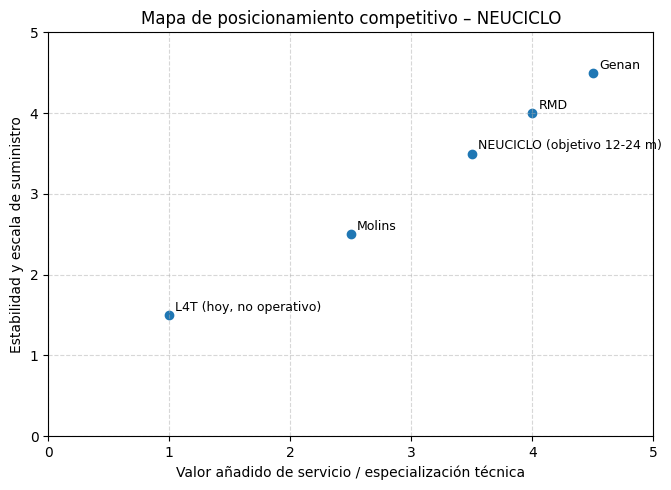

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

# Diagrama de dispersión
ax.scatter(x, y)


for xi, yi, label in zip(x, y, empresas):
    ax.text(xi + 0.05, yi + 0.05, label, fontsize=9)


ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel("Valor añadido de servicio / especialización técnica")
ax.set_ylabel("Estabilidad y escala de suministro")


ax.grid(True, linestyle="--", alpha=0.5)

plt.title("Mapa de posicionamiento competitivo – NEUCICLO")
plt.tight_layout()
plt.show()


In [ ]:
# Datos del embudo NEUCICLO
stages = [
    {
        "name": "POTENCIALES (U = 450)",
        "desc": "Universo de cuentas\nEspaña + Portugal",
        "value": 450,
    },
    {
        "name": "OBJETIVOS ICP (O = 270)",
        "desc": "Cuentas que encajan con\nperfil técnico y de volumen",
        "value": 270,
    },
    {
        "name": "CLIENTES (CLOSE = 10)",
        "desc": "Contratos de suministro\ncerrados Año 1",
        "value": 10,
    },
]


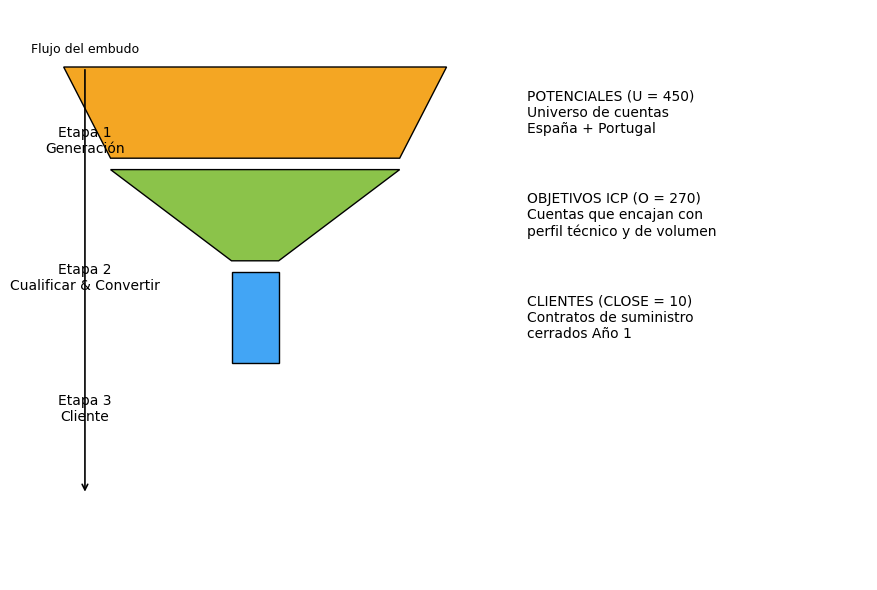

In [ ]:
colors = ["#f4a623", "#8bc34a", "#42a5f5"]

fig, ax = plt.subplots(figsize=(9, 6))

center_x = 0.28         
top_width = 0.45         
height = 0.18            
top_y = 0.9             


max_value = stages[0]["value"]
exp = 0.55  

top_widths = [top_width]
bottom_widths = []

for i in range(len(stages) - 1):
    ratio = stages[i + 1]["value"] / max_value
    bottom_w = top_width * (ratio ** exp)
    bottom_widths.append(bottom_w)
    top_widths.append(bottom_w)


ratio_last = stages[-1]["value"] / max_value
bottom_widths.append(top_width * (ratio_last ** exp))


for i, stage in enumerate(stages):
    y_top_seg = top_y - i * height
    y_bottom_seg = y_top_seg - height + 0.02  

    w_top = top_widths[i]
    w_bottom = bottom_widths[i]

    poly = Polygon(
        [
            (center_x - w_top / 2, y_top_seg),
            (center_x + w_top / 2, y_top_seg),
            (center_x + w_bottom / 2, y_bottom_seg),
            (center_x - w_bottom / 2, y_bottom_seg),
        ],
        closed=True,
        facecolor=colors[i],
        edgecolor="black",
    )
    ax.add_patch(poly)

 
    y_text = (y_top_seg + y_bottom_seg) / 2
    ax.text(
        0.6,
        y_text,
        f"{stage['name']}\n{stage['desc']}",
        ha="left",
        va="center",
        fontsize=10,
    )



ax.annotate(
    "",
    xy=(0.08, 0.15),
    xytext=(0.08, 0.9),
    arrowprops=dict(arrowstyle="->", linewidth=1.2),
)
ax.text(0.08, 0.92, "Flujo del embudo", ha="center", va="bottom", fontsize=9)

ax.text(0.08, 0.77, "Etapa 1\nGeneración",
        ha="center", va="center", fontsize=10)
ax.text(0.08, 0.53, "Etapa 2\nCualificar & Convertir",
        ha="center", va="center", fontsize=10)
ax.text(0.08, 0.30, "Etapa 3\nCliente",
        ha="center", va="center", fontsize=10)


ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:

# Etapas del embudo Year 1
stages = [
    "E0\nContacto",
    "E1\nMQL",
    "E2\nSQL",
    "E3\nPropuesta",
    "E4\nPiloto",
    "E5\nHomologado",
    "E6\nCliente"
]

# Número de cuentas por etapa (ya redondeadas)
values = [216, 76, 46, 37, 18, 14, 10]

# % de conversión respecto a la etapa anterior
conv_prev = [1.00, 0.35, 0.60, 0.80, 0.50, 0.80, 0.70]

# % acumulado respecto a A = 216 (para leer impacto total)
A = 216
conv_acc = [v / A for v in values]

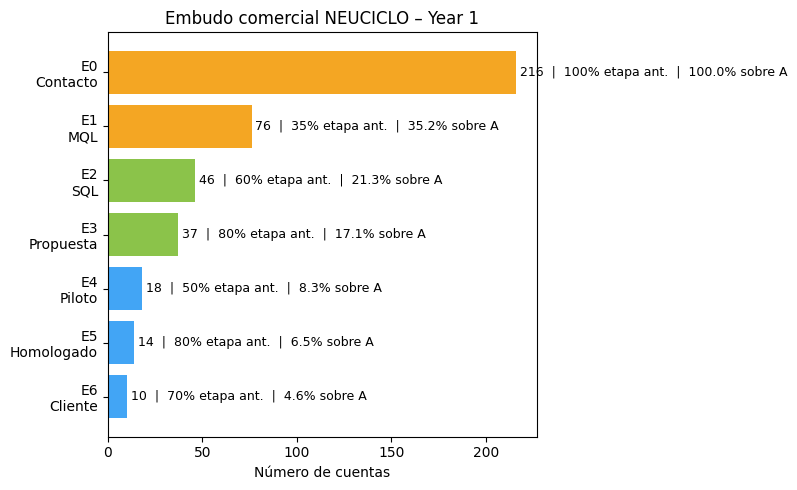

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

y_pos = range(len(stages))


ax.barh(y_pos, values, color=["#f4a623", "#f4a623", "#8bc34a",
                              "#8bc34a", "#42a5f5", "#42a5f5", "#42a5f5"])

ax.set_yticks(y_pos)
ax.set_yticklabels(stages)
ax.invert_yaxis()  
ax.set_xlabel("Número de cuentas")
ax.set_title("Embudo comercial NEUCICLO – Year 1")


for i, (v, cp, ca) in enumerate(zip(values, conv_prev, conv_acc)):
    ax.text(v + 2, i,
            f"{v}  |  {cp*100:,.0f}% etapa ant.  |  {ca*100:,.1f}% sobre A",
            va="center", fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
# Datos
etiquetas = [
    "U → Compradores",
    "A → Compradores",
    "SQL → Compradores"
]

numerador = 10
denominadores = [450, 216, 46]

porcentajes = [numerador / d * 100 for d in denominadores]

fig, ax = plt.subplots(figsize=(6, 4))

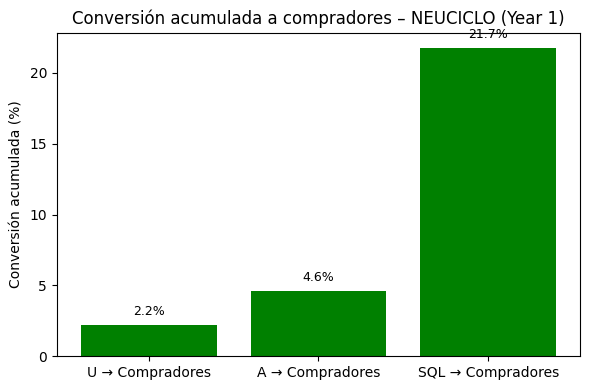

In [ ]:
ax.bar(etiquetas, porcentajes, color = "green")


ax.set_ylabel("Conversión acumulada (%)")
ax.set_title("Conversión acumulada a compradores – NEUCICLO (Year 1)")


for i, p in enumerate(porcentajes):
    ax.text(i, p + 0.5, f"{p:.1f}%", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


Este gráfico muestra tres barras comparando de forma visual la conversión desde U, desde A y desde SQL hasta compradores, resaltando cómo mejora el porcentaje a medida que se avanza en el funnel y se filtran las cuentas.

In [ ]:
# Etapas del embudo (desde respuesta hasta cierre)
etapas = ["E1 MQL\nrespuesta",
          "E2 SQL\ncualificación",
          "E3\npropuesta",
          "E4\npiloto",
          "E5\nhomologación",
          "E6\ncierre"]

# Tasas de conversión por etapa y escenario (en %)
conservador = [25, 50, 70, 40, 70, 60]
base        = [35, 60, 80, 50, 80, 70]
ambicioso   = [45, 70, 90, 60, 90, 75]

# Conversión a compradores estimados sobre A = 216 (según tu TFG)
compradores = {
    "Conservador": 6,
    "Base": 10,
    "Ambicioso": 16,
}

In [ ]:
# Figura 1: tasas por etapa

x = np.arange(len(etapas))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width, conservador, width, label="Conservador")
ax.bar(x,         base,        width, label="Base")
ax.bar(x + width, ambicioso,   width, label="Ambicioso")

ax.set_ylabel("Tasa de conversión por etapa (%)")
ax.set_title("Escenarios de sensibilidad por etapa del embudo")
ax.set_xticks(x)
ax.set_xticklabels(etapas)
ax.set_ylim(0, 100)
ax.legend()


for i, val in enumerate(base):
    ax.text(x[i], val + 2, f"{val}%", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

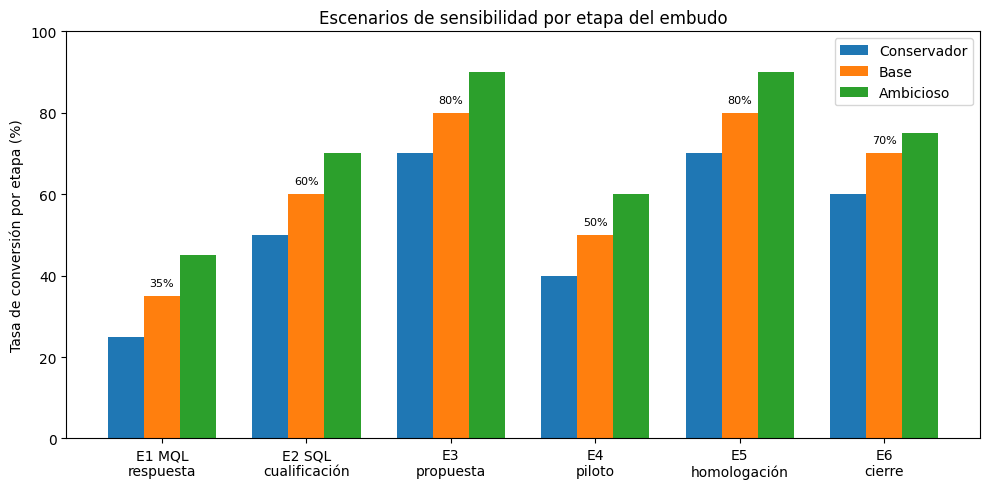

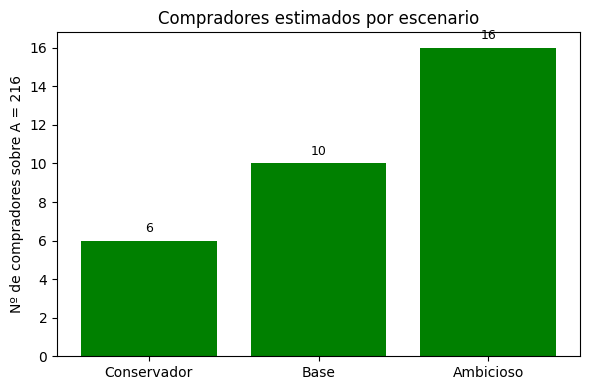

In [ ]:
# Figura 2: compradores finales

fig2, ax2 = plt.subplots(figsize=(6, 4))

escenarios = list(compradores.keys())
vals = list(compradores.values())

ax2.bar(escenarios, vals, color= "green")
ax2.set_ylabel("Nº de compradores sobre A = 216")
ax2.set_title("Compradores estimados por escenario")

for i, v in enumerate(vals):
    ax2.text(i, v + 0.3, f"{v}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
# 1) Volumen de ventas vs V̄

clientes_base = 10   # número de clientes en escenario base
V_min = 600          # t/año por cliente (bajo)
V_base = 800         # t/año por cliente (caso base)
V_max = 1000         # t/año por cliente (alto)

# Rango continuo de V̄ para la curva
V_range = np.linspace(V_min, V_max, 50)
ventas_total = clientes_base * V_range

In [ ]:
# 2) Rangos de conversión por etapa

etapas = [
    "E1\nMQL",
    "E2\nSQL",
    "E3\nPropuesta",
    "E4\nPiloto",
    "E5\nHomologación",
    "E6\nCierre",
]

# Rango min–max por etapa (%)
min_conv = np.array([25, 50, 70, 40, 70, 60])
base_conv = np.array([35, 60, 80, 50, 80, 70])  # caso base del TFG
max_conv = np.array([45, 70, 90, 60, 90, 75])

x = np.arange(len(etapas))


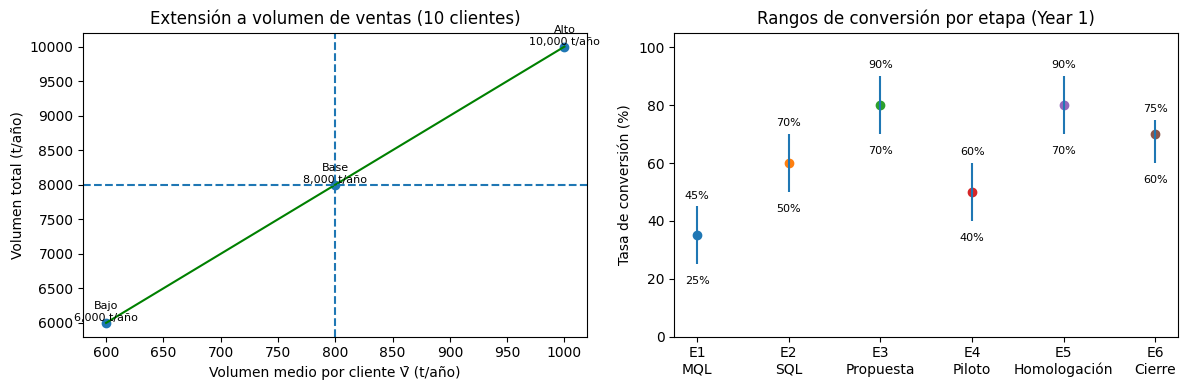

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# --- Subplot 1: volumen total vs V̄ ---
ax1.plot(V_range, ventas_total, color = "green")
ax1.axvline(V_base, linestyle="--")
ax1.axhline(clientes_base * V_base, linestyle="--")

ax1.set_xlabel("Volumen medio por cliente V̄ (t/año)")
ax1.set_ylabel("Volumen total (t/año)")
ax1.set_title("Extensión a volumen de ventas (10 clientes)")


ax1.scatter([V_min, V_base, V_max],
            [clientes_base * V_min,
             clientes_base * V_base,
             clientes_base * V_max])

ax1.text(V_min, clientes_base * V_min,
         f"\nBajo\n{clientes_base*V_min:,.0f} t/año",
         ha="center", va="bottom", fontsize=8)
ax1.text(V_base, clientes_base * V_base,
         f"\nBase\n{clientes_base*V_base:,.0f} t/año",
         ha="center", va="bottom", fontsize=8)
ax1.text(V_max, clientes_base * V_max,
         f"\nAlto\n{clientes_base*V_max:,.0f} t/año",
         ha="center", va="bottom", fontsize=8)

# --- Subplot 2: rangos de conversión por etapa ---
ax2.set_title("Rangos de conversión por etapa (Year 1)")
ax2.set_ylabel("Tasa de conversión (%)")
ax2.set_xticks(x)
ax2.set_xticklabels(etapas)


for i in range(len(etapas)):
    ax2.vlines(x[i], min_conv[i], max_conv[i])
    ax2.scatter(x[i], base_conv[i])  # punto base


for i in range(len(etapas)):
    ax2.text(x[i], max_conv[i] + 2, f"{max_conv[i]}%",
             ha="center", va="bottom", fontsize=8)
    ax2.text(x[i], min_conv[i] - 4, f"{min_conv[i]}%",
             ha="center", va="top", fontsize=8)

ax2.set_ylim(0, 105)

plt.tight_layout()
plt.show()


El gráfico 1 muestra cómo cambia el volumen total de ventas con 10 clientes cuando el volumen medio por cliente se mueve entre 600 y 1.000 t/año, marcando los tres puntos clave (bajo, base, alto).

El gráfico 2 muestra para cada etapa del embudo el intervalo de conversión [mínimo–máximo] y el punto base que has usado en el modelo, lo que te sirve para defender que trabajas con rangos realistas y no con un único número rígid

In [ ]:
# Universo y tasas
U = 450
tasa_ICP = 0.60          # U -> O
tasa_contactable = 0.80  # O -> A

t1 = 0.35  # A -> MQL
t2 = 0.60  # MQL -> SQL
t3 = 0.80  # SQL -> PROP
t4 = 0.50  # PROP -> PIL
t5 = 0.80  # PIL -> HOM
t6 = 0.70  # HOM -> CLOSE

V_bar = 800  # t/año por cliente

# Fórmulas del TFG
O     = U   * tasa_ICP
A     = O   * tasa_contactable
MQL   = A   * t1
SQL   = MQL * t2
PROP  = SQL * t3
PIL   = PROP * t4
HOM   = PIL * t5
CLOSE = HOM * t6

ventas_t = CLOSE * V_bar

# Redondeo a enteros donde tiene sentido "cuenta" (empresa)
O_r, A_r = round(O), round(A)
MQL_r    = round(MQL)
SQL_r    = round(SQL)
PROP_r   = round(PROP)
PIL_r    = round(PIL)
HOM_r    = round(HOM)
CLOSE_r  = round(CLOSE)


=== Embudo NEUCICLO – Aplicación de fórmulas ===

U     Universo                  =  450.0  (~450)
O     Objetivo ICP              =  270.0  (~270)
A     Contactables              =  216.0  (~216)
MQL   Respuesta / MQL           =   75.6  (~ 76)
SQL   Cualificación / SQL       =   45.4  (~ 45)
PROP  Propuestas emitidas       =   36.3  (~ 36)
PIL   Pilotos / muestras        =   18.1  (~ 18)
HOM   Homologaciones superadas  =   14.5  (~ 15)
CLOSE Clientes (CLOSE)          =   10.2  (~ 10)

Ventas en toneladas (t/año) = CLOSE × V̄ = 10.2 × 800 ≈ 8,129 t/año



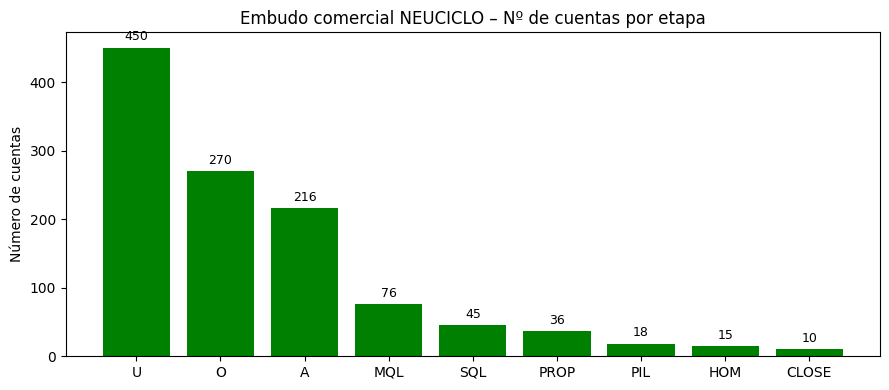

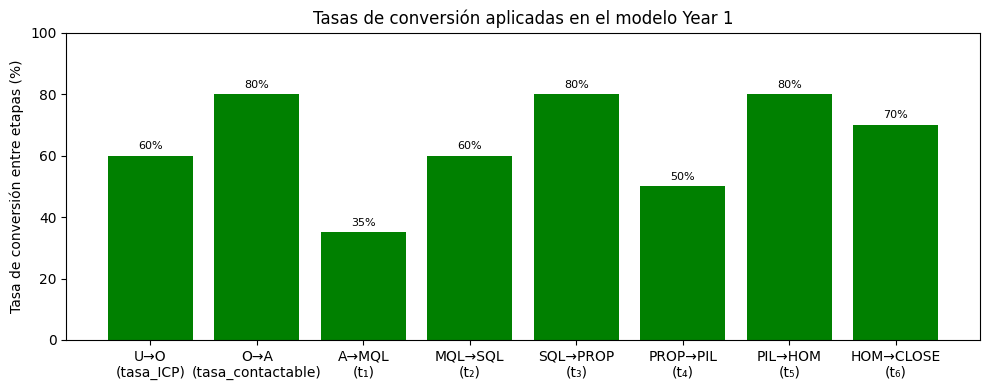

In [ ]:
# TABLA RESUMEN POR ETAPA

etapas = [
    ("U",    "Universo",                 U),
    ("O",    "Objetivo ICP",             O),
    ("A",    "Contactables",             A),
    ("MQL",  "Respuesta / MQL",          MQL),
    ("SQL",  "Cualificación / SQL",      SQL),
    ("PROP", "Propuestas emitidas",      PROP),
    ("PIL",  "Pilotos / muestras",       PIL),
    ("HOM",  "Homologaciones superadas", HOM),
    ("CLOSE","Clientes (CLOSE)",         CLOSE),
]

print(" Embudo NEUCICLO – Aplicación de fórmulas \n")
for cod, nombre, valor in etapas:
    print(f"{cod:<5} {nombre:<25} = {valor:6.1f}  (~{round(valor):3d})")

print(f"\nVentas en toneladas (t/año) = CLOSE × V̄ = {CLOSE:.1f} × {V_bar} ≈ {ventas_t:,.0f} t/año\n")


# GRÁFICO 1: Nº DE CUENTAS POR ETAPA


codigos = [e[0] for e in etapas]
valores = [e[2] for e in etapas]

fig, ax = plt.subplots(figsize=(9, 4))

ax.bar(codigos, valores, color = "green")
ax.set_title("Embudo comercial NEUCICLO – Nº de cuentas por etapa")
ax.set_ylabel("Número de cuentas")


for x, v in zip(codigos, valores):
    ax.text(x, v + max(valores)*0.015, f"{round(v)}",
            ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


# GRÁFICO 2: TASAS DE CONVERSIÓN ENTRE ETAPAS


# Secuencia de conversiones entre etapas:
# U -> O -> A -> MQL -> SQL -> PROP -> PIL -> HOM -> CLOSE
nombres_conv = [
    "U→O\n(tasa_ICP)",
    "O→A\n(tasa_contactable)",
    "A→MQL\n(t₁)",
    "MQL→SQL\n(t₂)",
    "SQL→PROP\n(t₃)",
    "PROP→PIL\n(t₄)",
    "PIL→HOM\n(t₅)",
    "HOM→CLOSE\n(t₆)",
]

tasas_conv = [
    tasa_ICP,
    tasa_contactable,
    t1, t2, t3, t4, t5, t6
]

porcentajes = [t * 100 for t in tasas_conv]

fig2, ax2 = plt.subplots(figsize=(10, 4))

ax2.bar(nombres_conv, porcentajes, color = "green")
ax2.set_ylim(0, 100)
ax2.set_ylabel("Tasa de conversión entre etapas (%)")
ax2.set_title("Tasas de conversión aplicadas en el modelo Year 1")

for x, p in zip(nombres_conv, porcentajes):
    ax2.text(x, p + 1.5, f"{p:.0f}%",
             ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()


Las fórmulas implementadas exactamente como las definiste.

-La tabla numérica del embudo con valores y redondeos.

Dos gráficos claros:

-Evolución del nº de cuentas por etapa.

-Tasas de conversión que has defendido para Year 1.

ESTIMACIÓN DE COSTES

In [ ]:
 # PARÁMETROS DEL ESCENARIO

# Embudo → clientes y volumen medio por cliente
clientes_base = 10
volumen_medio_cliente = 800.0  # t/año de caucho (granulados + polvos)

# Crecimiento de volumen de caucho reciclado (vs año anterior)
crecimiento_volumen = {
    1: 0.00,   # Año 1 base
    2: 0.20,   # +20% Año 2
    3: 0.15,   # +15% Año 3
}

# Mix de producto sobre el volumen total de caucho
mix_caucho = {
    "G10": 0.25,  # 25 %
    "G25": 0.25,  # 25 %
    "G40": 0.20,  # 20 %
    "P080": 0.20, # 20 %
    "P200": 0.10, # 10 %
}

# Rendimientos de proceso sobre el input de NFU
rendimientos = {
    "caucho": 0.70,
    "acero": 0.15,
    "textil": 0.10,
}

# Precios medios Año 1 (€/t)
precios_año1 = {
    "G10": 300.0,
    "G25": 320.0,
    "G40": 280.0,
    "P080": 450.0,
    "P200": 650.0,
    "Acero": 220.0,
    "Textil": 40.0,
}

# Indexación anual de precios
indexacion_precios = 0.03  # +3% / año



In [31]:
# Embudo → clientes y volumen medio por cliente
clientes_base = 10
volumen_medio_cliente = 800.0  # t/año de caucho (granulados + polvos)

# Crecimiento de volumen de caucho reciclado (vs año anterior)
crecimiento_volumen = {
    1: 0.00,   # Año 1 base
    2: 0.20,   # +20% Año 2
    3: 0.15,   # +15% Año 3
}

# Mix de producto sobre el volumen total de caucho
mix_caucho = {
    "G10": 0.25,   # 25 %
    "G25": 0.25,   # 25 %
    "G40": 0.20,   # 20 %
    "P080": 0.20,  # 20 %
    "P200": 0.10,  # 10 %
}

# Rendimientos de proceso sobre el input de NFU
rendimientos = {
    "caucho": 0.70,
    "acero": 0.15,
    "textil": 0.10,
}

# Precios medios Año 1 (€/t)
precios_año1 = {
    "G10": 300.0,
    "G25": 320.0,
    "G40": 280.0,
    "P080": 450.0,
    "P200": 650.0,
    "Acero": 220.0,
    "Textil": 40.0,
}

# Indexación anual de precios
indexacion_precios = 0.03  # +3% / año



def precio_en_año(precio_base, año):
    """
    Aplica indexación +3% anual a partir del Año 1.
    Año 1: precio_base
    Año 2: precio_base * (1 + 0.03)
    Año 3: precio_base * (1 + 0.03)^2
    """
    if año == 1:
        return precio_base
    else:
        return precio_base * ((1 + indexacion_precios) ** (año - 1))


def fmt_euros(x):
    return f"{x:,.0f}".replace(",", ".")



resumen_volumen = {}
resumen_ingresos = {}

for año in [1, 2, 3]:
    # Volumen total de caucho (granulados + polvos) en t/año
    if año == 1:
        volumen_caucho_total = clientes_base * volumen_medio_cliente
    else:
        volumen_caucho_total = (
            resumen_volumen[año - 1]["caucho_total_t"]
            * (1 + crecimiento_volumen[año])
        )

    # Input de NFU necesario
    input_nfu = volumen_caucho_total / rendimientos["caucho"]

    # Acero y textil recuperados
    volumen_acero = input_nfu * rendimientos["acero"]
    volumen_textil = input_nfu * rendimientos["textil"]

    # Volumen por gama de caucho
    vol_gamas = {}
    for gama, pct in mix_caucho.items():
        vol_gamas[gama] = volumen_caucho_total * pct

    # Ingresos por gama de caucho
    ing_gamas = {}
    for gama, vol_t in vol_gamas.items():
        p_base = precios_año1[gama]
        p_año = precio_en_año(p_base, año)
        ing_gamas[gama] = vol_t * p_año

    # Ingresos por acero y textil
    p_acero = precio_en_año(precios_año1["Acero"], año)
    p_textil = precio_en_año(precios_año1["Textil"], año)

    ing_acero = volumen_acero * p_acero
    ing_textil = volumen_textil * p_textil

    # Resumen anual volúmenes
    resumen_volumen[año] = {
        "Año": año,
        "caucho_total_t": volumen_caucho_total,
        "input_nfu_t": input_nfu,
        "acero_t": volumen_acero,
        "textil_t": volumen_textil,
        **{f"{gama}_t": vol for gama, vol in vol_gamas.items()},
    }

    # Resumen anual ingresos
    resumen_ingresos[año] = {
        "Año": año,
        **{f"{gama}_€": ing for gama, ing in ing_gamas.items()},
        "Acero_€": ing_acero,
        "Textil_€": ing_textil,
    }



# COMPARATIVA: 3 TABLAS ANUALES


años = [1, 2, 3]
gamas = ["G10", "G25", "G40", "P080", "P200"]

print("=== TABLA 1: Volúmenes anuales por tipo de material (t/año) ===\n")
print(f"{'Año':<5}{'Caucho_total_t':>18}{'Input_NFU_t':>18}{'Acero_t':>12}{'Textil_t':>12}")
for año in años:
    v = resumen_volumen[año]
    print(
        f"{año:<5}"
        f"{v['caucho_total_t']:>18.1f}"
        f"{v['input_nfu_t']:>18.1f}"
        f"{v['acero_t']:>12.1f}"
        f"{v['textil_t']:>12.1f}"
    )

print("\n=== TABLA 2: Ingresos anuales totales (caucho + subproductos) ===\n")
print(f"{'Año':<5}{'Ing_caucho_€':>18}{'Ing_subprod_€':>18}{'Total_ingresos_€':>20}")
ingresos_totales = []

for año in años:
    ing = resumen_ingresos[año]
    ingresos_caucho = sum(ing[f"{g}_€"] for g in gamas)
    ingresos_sub = ing["Acero_€"] + ing["Textil_€"]
    total = ingresos_caucho + ingresos_sub
    ingresos_totales.append(total)

    print(
        f"{año:<5}"
        f"{fmt_euros(ingresos_caucho):>18}"
        f"{fmt_euros(ingresos_sub):>18}"
        f"{fmt_euros(total):>20}"
    )

print("\n=== TABLA 3: Ingresos por gama de caucho y año (M€) ===\n")
# Cabecera
cabecera = f"{'Gama':<6}" + "".join([f"Año {a:>3}" for a in años])
print(cabecera)
for gama in gamas:
    fila = f"{gama:<6}"
    for año in años:
        valor_M = resumen_ingresos[año][f"{gama}_€"] / 1e6
        fila += f"{valor_M:>8.2f}"
    print(fila)




=== TABLA 1: Volúmenes anuales por tipo de material (t/año) ===

Año      Caucho_total_t       Input_NFU_t     Acero_t    Textil_t
1                8000.0           11428.6      1714.3      1142.9
2                9600.0           13714.3      2057.1      1371.4
3               11040.0           15771.4      2365.7      1577.1

=== TABLA 2: Ingresos anuales totales (caucho + subproductos) ===

Año        Ing_caucho_€     Ing_subprod_€    Total_ingresos_€
1             2.928.000           422.857           3.350.857
2             3.619.008           522.651           4.141.659
3             4.286.715           619.081           4.905.796

=== TABLA 3: Ingresos por gama de caucho y año (M€) ===

Gama  Año   1Año   2Año   3
G10       0.60    0.74    0.88
G25       0.64    0.79    0.94
G40       0.45    0.55    0.66
P080      0.72    0.89    1.05
P200      0.52    0.64    0.76


=== PROYECCIÓN DE VENTAS POR GAMA (t y €) – ESCENARIO BASE ===

--- Año 1 ---
Volumen total caucho (granulados + polvos): 8,000.0 t
Input NFU estimado:                           11,428.6 t
Acero recuperado:                             1,714.3 t
Textil recuperado:                            1,142.9 t

Caucho por gama:
  G10 :  2000.0 t  x    300.0 €/t  →  600.000 €
  G25 :  2000.0 t  x    320.0 €/t  →  640.000 €
  G40 :  1600.0 t  x    280.0 €/t  →  448.000 €
  P080:  1600.0 t  x    450.0 €/t  →  720.000 €
  P200:   800.0 t  x    650.0 €/t  →  520.000 €

Subproductos:
  Acero :  1714.3 t  x    220.0 €/t  →  377.143 €
  Textil:  1142.9 t  x     40.0 €/t  →  45.714 €

Ingresos caucho (gamas): 2.928.000 €
Ingresos subproductos  : 422.857 €
TOTAL ingresos Año 1: 3.350.857 €

------------------------------------------------------------
--- Año 2 ---
Volumen total caucho (granulados + polvos): 9,600.0 t
Input NFU estimado:                           13,714.3 t
Acero recuperado:                

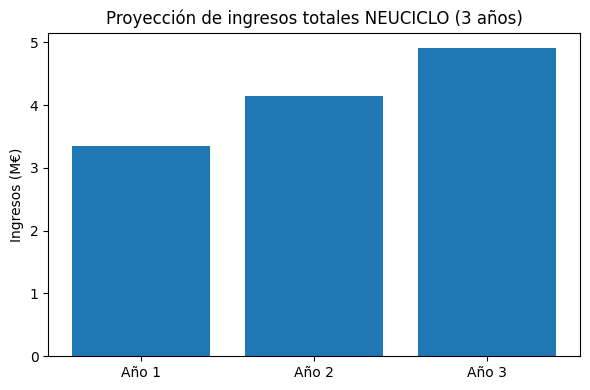

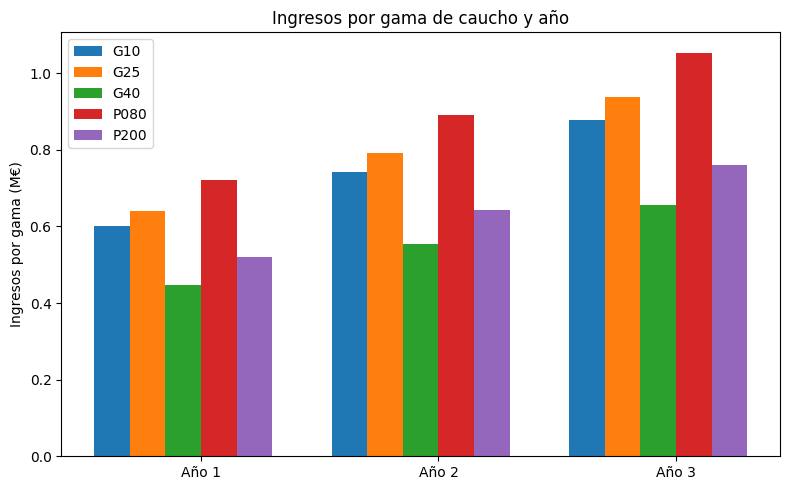

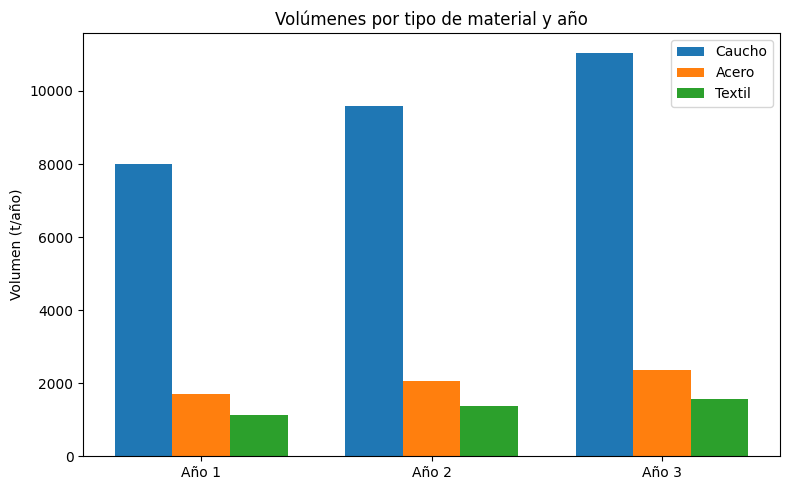

Archivo Excel guardado en: NEUCICLO_proyeccion_ventas.xlsx


In [ ]:
def fmt_euros(x):
    return f"{x:,.0f} €".replace(",", ".")

print("=== PROYECCIÓN DE VENTAS POR GAMA (t y €) – ESCENARIO BASE ===\n")

for año in [1, 2, 3]:
    print(f"--- Año {año} ---")

    vol = resumen_volumen[año]
    ing = resumen_ingresos[año]

    print(f"Volumen total caucho (granulados + polvos): {vol['caucho_total_t']:,.1f} t")
    print(f"Input NFU estimado:                           {vol['input_nfu_t']:,.1f} t")
    print(f"Acero recuperado:                             {vol['acero_t']:,.1f} t")
    print(f"Textil recuperado:                            {vol['textil_t']:,.1f} t\n")

    print("Caucho por gama:")
    total_ingresos_caucho = 0.0
    for gama in ["G10", "G25", "G40", "P080", "P200"]:
        v_t = vol[f"{gama}_t"]
        p_año = precio_en_año(precios_año1[gama], año)
        ingresos = ing[f"{gama}_€"]
        total_ingresos_caucho += ingresos
        print(
            f"  {gama:<4}: {v_t:7.1f} t  x  {p_año:7.1f} €/t  →  {fmt_euros(ingresos)}"
        )

    print("\nSubproductos:")
    print(f"  Acero : {vol['acero_t']:7.1f} t  x  {precio_en_año(precios_año1['Acero'], año):7.1f} €/t  →  {fmt_euros(ing['Acero_€'])}")
    print(f"  Textil: {vol['textil_t']:7.1f} t  x  {precio_en_año(precios_año1['Textil'], año):7.1f} €/t  →  {fmt_euros(ing['Textil_€'])}")

    total_ingresos = total_ingresos_caucho + ing["Acero_€"] + ing["Textil_€"]
    print(f"\nIngresos caucho (gamas): {fmt_euros(total_ingresos_caucho)}")
    print(f"Ingresos subproductos  : {fmt_euros(ing['Acero_€'] + ing['Textil_€'])}")
    print(f"TOTAL ingresos Año {año}: {fmt_euros(total_ingresos)}\n")
    print("-" * 60)


# INGRESOS TOTALES POR AÑO (M€)

años = [1, 2, 3]
ingresos_totales = [sum(resumen_ingresos[a].values()) for a in años]

plt.figure(figsize=(6, 4))
plt.bar(años, [v / 1e6 for v in ingresos_totales])
plt.xticks(años, [f"Año {a}" for a in años])
plt.ylabel("Ingresos (M€)")
plt.title("Proyección de ingresos totales NEUCICLO (3 años)")
plt.tight_layout()
plt.show()


# INGRESOS POR GAMA DE CAUCHO Y AÑO


gamas = ["G10", "G25", "G40", "P080", "P200"]
x = range(len(años))
ancho = 0.15 

plt.figure(figsize=(8, 5))

for i, gama in enumerate(gamas):
    valores = [resumen_ingresos[a][f"{gama}_€"] / 1e6 for a in años]
    posiciones = [xi + (i - len(gamas)/2) * ancho for xi in x]
    plt.bar(posiciones, valores, width=ancho, label=gama)

plt.xticks(x, [f"Año {a}" for a in años])
plt.ylabel("Ingresos por gama (M€)")
plt.title("Ingresos por gama de caucho y año")
plt.legend()
plt.tight_layout()
plt.show()


# VOLÚMENES CAUCHO / ACERO / TEXTIL POR AÑO


vol_caucho = [resumen_volumen[a]["caucho_total_t"] for a in años]
vol_acero  = [resumen_volumen[a]["acero_t"] for a in años]
vol_textil = [resumen_volumen[a]["textil_t"] for a in años]

x = range(len(años))
ancho = 0.25

plt.figure(figsize=(8, 5))

plt.bar([xi - ancho for xi in x], vol_caucho, width=ancho, label="Caucho")
plt.bar(x, vol_acero, width=ancho, label="Acero")
plt.bar([xi + ancho for xi in x], vol_textil, width=ancho, label="Textil")

plt.xticks(x, [f"Año {a}" for a in años])
plt.ylabel("Volumen (t/año)")
plt.title("Volúmenes por tipo de material y año")
plt.legend()
plt.tight_layout()
plt.show()




In [ ]:
def guardar_resultados_excel(ruta="NEUCICLO_proyeccion_ventas.xlsx"):
    """
    Guarda los resultados de resumen_volumen y resumen_ingresos
    en un archivo Excel con tres hojas:
      - 'Volumen': volúmenes por año y gama
      - 'Ingresos': ingresos por año y gama
      - 'Totales': resumen de ingresos totales por año + gráfico
    """
    # DataFrame de volúmenes
    df_vol = pd.DataFrame.from_dict(resumen_volumen, orient="index")
    df_vol = df_vol.sort_values("Año")

    # DataFrame de ingresos
    df_ing = pd.DataFrame.from_dict(resumen_ingresos, orient="index")
    df_ing = df_ing.sort_values("Año")

    # Totales de ingresos por año
    df_tot = df_ing.copy()
    df_tot["Ingresos_totales_€"] = df_tot.drop(columns=["Año"]).sum(axis=1)
    df_tot = df_tot[["Año", "Ingresos_totales_€"]]

    with pd.ExcelWriter(ruta, engine="xlsxwriter") as writer:
        df_vol.to_excel(writer, sheet_name="Volumen", index=False)
        df_ing.to_excel(writer, sheet_name="Ingresos", index=False)
        df_tot.to_excel(writer, sheet_name="Totales", index=False)

        workbook  = writer.book
        worksheet = writer.sheets["Totales"]

        chart = workbook.add_chart({'type': 'column'})
        max_row = len(df_tot) + 1  # +1 por cabecera
        chart.add_series({
            'name':       'Ingresos totales',
            'categories': f"=Totales!$A$2:$A${max_row}",
            'values':     f"=Totales!$B$2:$B${max_row}",
        })
        chart.set_title({'name': 'Ingresos totales por año'})
        chart.set_x_axis({'name': 'Año'})
        chart.set_y_axis({'name': '€'})

        worksheet.insert_chart('D2', chart)

    print(f"Archivo Excel guardado en: {ruta}")


In [ ]:
# LLAMADA OPCIONAL PARA GUARDAR A EXCEL

guardar_resultados_excel("NEUCICLO_proyeccion_ventas.xlsx")

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_27408\3890031314.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(kpi_labels, rotation=45, ha="right")


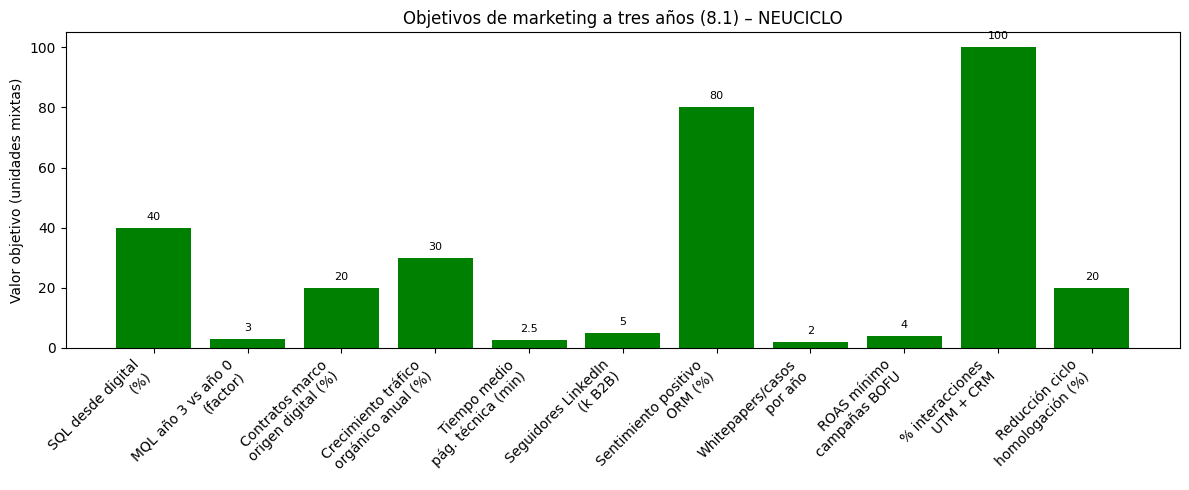

In [ ]:
# 2) GRÁFICO OBJETIVOS 8.1 – MARKETING A 3 AÑOS

# Seleccionamos algunos KPIs clave de 8.1:
# (valores expresados de forma que se puedan comparar en una gráfica)

kpi_labels = [
    "SQL desde digital\n(%)",
    "MQL año 3 vs año 0\n(factor)",
    "Contratos marco\norigen digital (%)",
    "Crecimiento tráfico\norgánico anual (%)",
    "Tiempo medio\npág. técnica (min)",
    "Seguidores LinkedIn\n(k B2B)",
    "Sentimiento positivo\nORM (%)",
    "Whitepapers/casos\npor año",
    "ROAS mínimo\ncampañas BOFU",
    "% interacciones\nUTM + CRM",
    "Reducción ciclo\nhomologación (%)"
]

# KPIs según texto (adaptando unidades cuando conviene)
kpi_values = [
    40,   # ≥40 % SQL digitales
    3,    # x3 MQL
    20,   # ≥20 % contratos marco origen digital
    30,   # ≥30 % crecimiento tráfico orgánico
    2.5,  # ≥2:30 min ~ 2.5 min
    5,    # ≥5.000 seguidores (5k)
    80,   # ≥80 % sentimiento positivo
    2,    # 2 whitepapers/casos año
    4,    # ROAS ≥4
    100,  # 100 % interacciones con UTM+CRM
    20    # ≥20 % reducción ciclo
]

fig2, ax2 = plt.subplots(figsize=(12, 5))

bars = ax2.bar(kpi_labels, kpi_values, color = "green")
ax2.set_title("Objetivos de marketing a tres años (8.1) – NEUCICLO")
ax2.set_ylabel("Valor objetivo (unidades mixtas)")
ax2.set_xticklabels(kpi_labels, rotation=45, ha="right")

# Etiquetas encima de cada barra con el valor
for bar, val in zip(bars, kpi_values):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + max(kpi_values) * 0.02,
        f"{val}",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()


Gráfico 1 (Gantt):

Eje X: meses 0–36.

Eje Y: grandes líneas de trabajo (infraestructura digital, contenidos, portal cliente, internacional, etc.).

Ves claro qué se hace en 0–12, 12–24 y 24–36 meses, alineado con 8.2.1 / 8.2.2 / 8.2.3.

Gráfico 2 (barras de objetivos):

Resume los KPI objetivo de 8.1: % SQL digitales, factor MQL, % contratos marco digitales, crecimiento orgánico, minutos en página, seguidores LinkedIn, sentimiento ORM, nº whitepapers, ROAS, % UTM+CRM y reducción de ciclo de homologación.



8.3. Estimación de costes asociados
8.3. Estimación de costes asociados


In [ ]:
# Rangos anuales orientativos por partida (en euros)
partidas = [
    "Infraestructura\nrecurrente",
    "Contenidos\ntécnicos",
    "Contenidos\nmultimedia",
    "SEO/SEM y\npaid media",
    "Soporte\nSEO/SEM",
    "Webinars",
    "PR y\nearned media",
    "Herramientas\nORM"
]

min_anual = [
    8000,   # Infraestructura recurrente (años 2–3): 8.000–12.000
    8000,   # Contenidos técnicos: 8.000–12.000
    6000,   # Producción audiovisual: 6.000–10.000
    12000,  # Medios SEM/paid: 12.000–18.000
    5000,   # Soporte SEO/SEM: 5.000–8.000
    2000,   # Webinars: 2.000–4.000
    3000,   # PR: 3.000–6.000
    1500,   # ORM tools: 1.500–3.000
]

max_anual = [
    12000,
    12000,
    10000,
    18000,
    8000,
    4000,
    6000,
    3000,
]

# Sobrecoste inicial año 1 (CAPEX, portal 1.0, setup, contenidos iniciales)
extra_year1_min = 15000
extra_year1_max = 25000

# Cálculo de totales recurrentes aproximados (suma de partidas)
rec_min = sum(min_anual)
rec_max = sum(max_anual)

# Coste total por año (rango mínimo–máximo)
years = ["Año 1", "Año 2", "Año 3"]
year_min = [
    rec_min + extra_year1_min,  
    rec_min,                   
    rec_min                     
]
year_max = [
    rec_max + extra_year1_max,
    rec_max,
    rec_max
]

# Para el gráfico usaremos el valor medio y la "barra de error"
year_mean = [(lo + hi) / 2 for lo, hi in zip(year_min, year_max)]
year_err = [(hi - lo) / 2 for lo, hi in zip(year_min, year_max)]


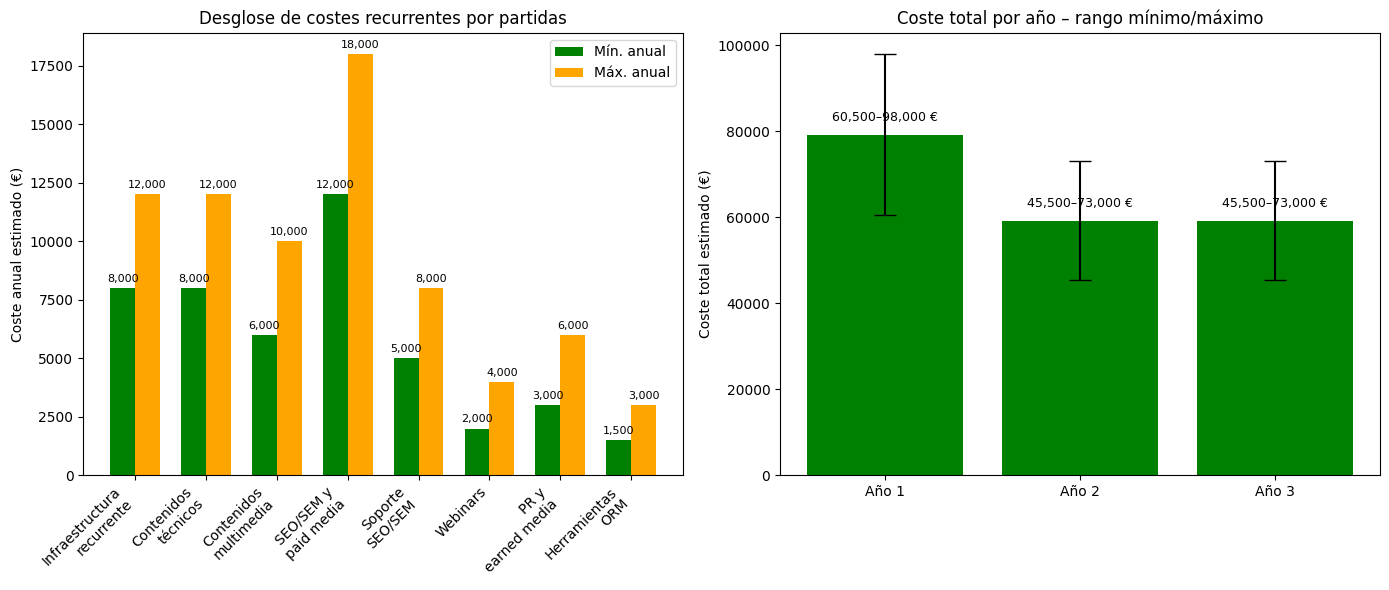

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


# Subplot 1: Partidas

x = np.arange(len(partidas))
width = 0.35

ax1.bar(x - width/2, min_anual, width, label="Mín. anual", color = "green")
ax1.bar(x + width/2, max_anual, width, label="Máx. anual",  color = "orange")

ax1.set_title("Desglose de costes recurrentes por partidas")
ax1.set_ylabel("Coste anual estimado (€)")
ax1.set_xticks(x)
ax1.set_xticklabels(partidas, rotation=45, ha="right")


for i, (mn, mx) in enumerate(zip(min_anual, max_anual)):
    ax1.text(i - width/2, mn + max(max_anual)*0.01, f"{mn:,.0f}", ha="center", va="bottom", fontsize=8)
    ax1.text(i + width/2, mx + max(max_anual)*0.01, f"{mx:,.0f}", ha="center", va="bottom", fontsize=8)

ax1.legend()


# Subplot 2: Coste total por año (rango)

x2 = np.arange(len(years))

ax2.bar(x2, year_mean, yerr=year_err, capsize=8, color = "green")
ax2.set_xticks(x2)
ax2.set_xticklabels(years)
ax2.set_ylabel("Coste total estimado (€)")
ax2.set_title("Coste total por año – rango mínimo/máximo")


for i, (lo, hi) in enumerate(zip(year_min, year_max)):
    ax2.text(
        i,
        year_mean[i] + max(year_mean)*0.03,
        f"{lo:,.0f}–{hi:,.0f} €",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()


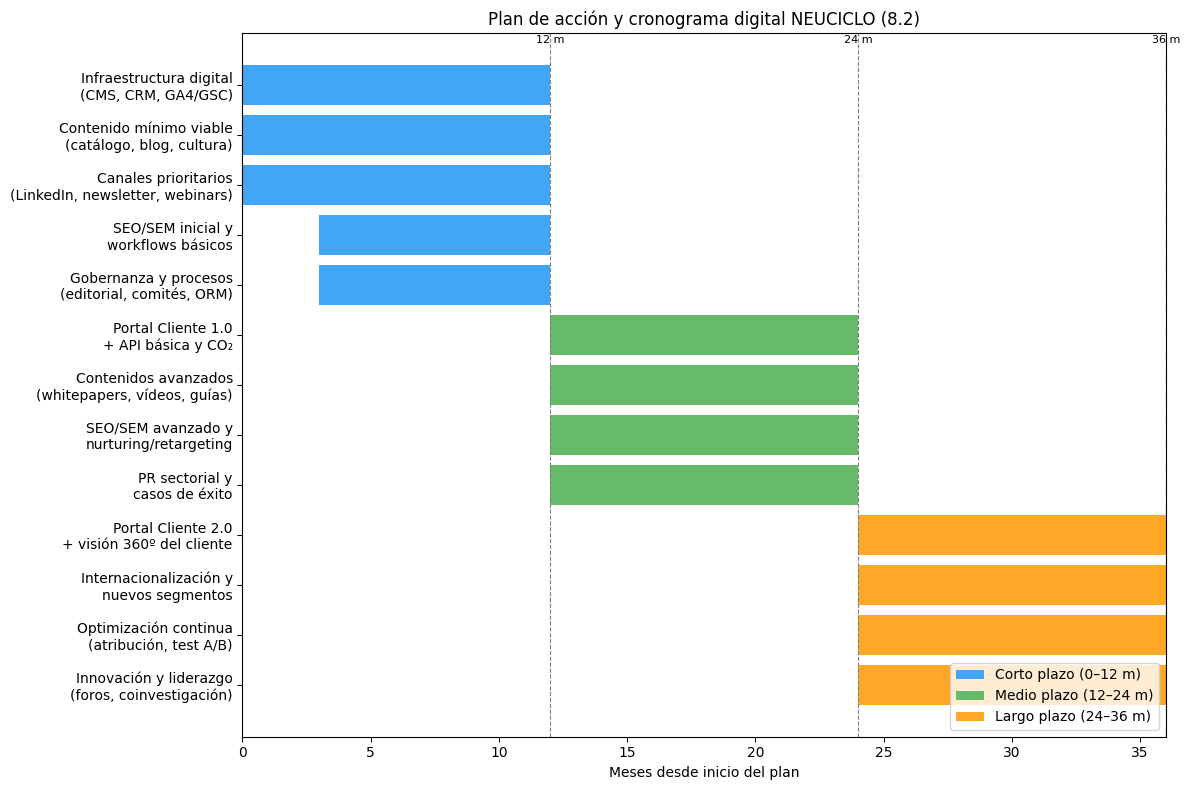

In [ ]:
# PLAN DE ACCIÓN DIGITAL NEUCICLO 
# GANTT MEJORADO 0–36 MESES


tareas = [
    # Corto plazo (0–12 meses)
    {
        "nombre": "Infraestructura digital\n(CMS, CRM, GA4/GSC)",
        "inicio": 0,
        "fin": 12,
        "fase": "Corto plazo (0–12 m)"
    },
    {
        "nombre": "Contenido mínimo viable\n(catálogo, blog, cultura)",
        "inicio": 0,
        "fin": 12,
        "fase": "Corto plazo (0–12 m)"
    },
    {
        "nombre": "Canales prioritarios\n(LinkedIn, newsletter, webinars)",
        "inicio": 0,
        "fin": 12,
        "fase": "Corto plazo (0–12 m)"
    },
    {
        "nombre": "SEO/SEM inicial y\nworkflows básicos",
        "inicio": 3,
        "fin": 12,
        "fase": "Corto plazo (0–12 m)"
    },
    {
        "nombre": "Gobernanza y procesos\n(editorial, comités, ORM)",
        "inicio": 3,
        "fin": 12,
        "fase": "Corto plazo (0–12 m)"
    },

    # Medio plazo (12–24 meses)
    {
        "nombre": "Portal Cliente 1.0\n+ API básica y CO₂",
        "inicio": 12,
        "fin": 24,
        "fase": "Medio plazo (12–24 m)"
    },
    {
        "nombre": "Contenidos avanzados\n(whitepapers, vídeos, guías)",
        "inicio": 12,
        "fin": 24,
        "fase": "Medio plazo (12–24 m)"
    },
    {
        "nombre": "SEO/SEM avanzado y\nnurturing/retargeting",
        "inicio": 12,
        "fin": 24,
        "fase": "Medio plazo (12–24 m)"
    },
    {
        "nombre": "PR sectorial y\ncasos de éxito",
        "inicio": 12,
        "fin": 24,
        "fase": "Medio plazo (12–24 m)"
    },

    # Largo plazo (24–36 meses)
    {
        "nombre": "Portal Cliente 2.0\n+ visión 360º del cliente",
        "inicio": 24,
        "fin": 36,
        "fase": "Largo plazo (24–36 m)"
    },
    {
        "nombre": "Internacionalización y\nnuevos segmentos",
        "inicio": 24,
        "fin": 36,
        "fase": "Largo plazo (24–36 m)"
    },
    {
        "nombre": "Optimización continua\n(atribución, test A/B)",
        "inicio": 24,
        "fin": 36,
        "fase": "Largo plazo (24–36 m)"
    },
    {
        "nombre": "Innovación y liderazgo\n(foros, coinvestigación)",
        "inicio": 24,
        "fin": 36,
        "fase": "Largo plazo (24–36 m)"
    },
]

# Ordenamos tareas por inicio y fase para que el Gantt quede limpio
fase_orden = {
    "Corto plazo (0–12 m)": 0,
    "Medio plazo (12–24 m)": 1,
    "Largo plazo (24–36 m)": 2,
}
tareas_sorted = sorted(
    tareas,
    key=lambda t: (fase_orden[t["fase"]], t["inicio"])
)

# Paleta por fase
colores_fase = {
    "Corto plazo (0–12 m)": "#42a5f5",   
    "Medio plazo (12–24 m)": "#66bb6a",  
    "Largo plazo (24–36 m)": "#ffa726",  
}

# Construimos vectores para el gráfico
n = len(tareas_sorted)
y_pos = np.arange(n)

inicio = [t["inicio"] for t in tareas_sorted]
duracion = [t["fin"] - t["inicio"] for t in tareas_sorted]
nombres = [t["nombre"] for t in tareas_sorted]
fases = [t["fase"] for t in tareas_sorted]
colores = [colores_fase[f] for f in fases]

fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(y_pos, duracion, left=inicio, color=colores)

ax.set_yticks(y_pos)
ax.set_yticklabels(nombres)
ax.invert_yaxis()  

ax.set_xlabel("Meses desde inicio del plan")
ax.set_xlim(0, 36)
ax.set_title("Plan de acción y cronograma digital NEUCICLO (8.2)")

# Líneas verticales marcando los 12 y 24 meses (fin de cada horizonte)
for x, label in zip([12, 24, 36], ["12 m", "24 m", "36 m"]):
    ax.axvline(x, color="gray", linestyle="--", linewidth=0.8)
    ax.text(x, -0.8, label, ha="center", va="bottom", fontsize=8)


legend_elements = [
    Patch(facecolor=colores_fase["Corto plazo (0–12 m)"], label="Corto plazo (0–12 m)"),
    Patch(facecolor=colores_fase["Medio plazo (12–24 m)"], label="Medio plazo (12–24 m)"),
    Patch(facecolor=colores_fase["Largo plazo (24–36 m)"], label="Largo plazo (24–36 m)"),
]
ax.legend(handles=legend_elements, loc="lower right")

plt.tight_layout()
plt.show()


ANEXO_ESTIMACIONES_EXCEL

In [ ]:
ruta_excel = "NEUCICLO_estimaciones_completas.xlsx"
hoja = "Estimaciones"


# 1) Embudo comercial Year 1


data_embudo = [
    ["U",  "Universo empresas (ES+PT)",                    "",   450],
    ["O",  "Cuentas ICP (tasa_ICP)",                       60,   270],
    ["A",  "Cuentas contactables (tasa_contactable)",      80,   216],
    ["E1 MQL", "Leads con respuesta / MQL",                35,    76],
    ["E2 SQL", "Leads cualificados / SQL",                 60,    46],
    ["E3 Propuesta", "Propuesta económica–técnica",        80,    37],
    ["E4 Piloto", "Piloto / pruebas de proceso",           50,    18],
    ["E5 Homologación", "Homologación superada",           80,    14],
    ["E6 Cierre", "Contratos de suministro (clientes)",    70,    10],
]

df_embudo = pd.DataFrame(
    data_embudo,
    columns=["Etapa", "Descripción", "Tasa_%", "Cuentas"]
)


# 2) Conversión acumulada (U, A, SQL → compradores)


data_conv = [
    ["U → Compradores",       450, 10,  2.2],
    ["A → Compradores",       216, 10,  4.6],
    ["SQL (E2) → Compradores", 46, 10, 21.7],
]

df_conv = pd.DataFrame(
    data_conv,
    columns=["Origen", "Denominador", "Compradores", "Ratio_%"]
)


# 3) Escenarios de sensibilidad – tasas por etapa


data_sens_tasas = [
    ["E1 MQL respuesta", 25, 35, 45],
    ["E2 SQL",           50, 60, 70],
    ["E3 Propuesta",     70, 80, 90],
    ["E4 Piloto",        40, 50, 60],
    ["E5 Homologación",  70, 80, 90],
    ["E6 Cierre",        60, 70, 75],
]

df_sens_tasas = pd.DataFrame(
    data_sens_tasas,
    columns=["Etapa", "Conservador_%", "Base_%", "Ambicioso_%"]
)

data_sens_clientes = [
    ["Conservador", 6],
    ["Base",        10],
    ["Ambicioso",   16],
]

df_sens_clientes = pd.DataFrame(
    data_sens_clientes,
    columns=["Escenario", "Compradores_estimados"]
)


# 4) Volumen de ventas (t/año) a partir de clientes

data_volumen = [
    ["Base",              10, 800,  8000],
    ["Sensibilidad_baja", 10, 600,  6000],
    ["Sensibilidad_alta", 10, 1000, 10000],
]

df_volumen = pd.DataFrame(
    data_volumen,
    columns=["Escenario", "Clientes", "Vmedio_t_por_cliente", "Ventas_totales_t_año"]
)


# 5) Justificación de las tasas de conversión


data_just = [
    ["E1 Respuesta / MQL", "25–45",
     "Outreach sobre ICP cualificado + oferta técnica (muestras, curvas granulométricas, EN 14243) rinde mejor que mailing frío genérico."],
    ["E2 SQL", "50–70",
     "Filtro por encaje técnico y económico; la ingeniería de aplicación acompaña y mejora la tasa de paso."],
    ["E3 Propuesta", "70–90",
     "Si ya hubo visita y pruebas de laboratorio, la mayoría de oportunidades pasan a oferta formal."],
    ["E4 Piloto", "40–60",
     "Limitado por ventanas de prueba del cliente y costes de cambio; la planificación conjunta mejora esta etapa."],
    ["E5 Homologación", "70–90",
     "Con material estable y buen control de impurezas (acero/textil/humedad), la tasa de éxito de homologación es alta."],
    ["E6 Cierre", "60–75",
     "Se incrementa gracias a SLAs claros (OTIF ≥95 %), logística y contratos marco que reducen el riesgo percibido."],
]

df_just = pd.DataFrame(
    data_just,
    columns=["Etapa", "Rango_%", "Justificación"]
)


# 6) Objetivos de marketing a tres años (KPI)


data_kpi = [
    ["% SQL desde canales digitales",              "≥40 %"],
    ["Factor MQL vs año 0",                        "x3"],
    ["% contratos marco con origen digital",       "≥20 %"],
    ["Crecimiento anual tráfico orgánico cualificado", "≥30 % / año"],
    ["Tiempo medio en contenidos técnicos",        "≥2,5 min"],
    ["Seguidores LinkedIn B2B",                    "≥5.000"],
    ["Sentimiento positivo ORM",                   "≥80 %"],
    ["Whitepapers / casos técnicos al año",        "≥2 / año"],
    ["ROAS mínimo campañas BOFU",                  "≥4"],
    ["% interacciones clave con UTM+CRM",          "100 %"],
    ["Reducción ciclo homologación/comercialización", "≥20 %"],
]

df_kpi = pd.DataFrame(
    data_kpi,
    columns=["KPI", "Objetivo"]
)


# 7) Gantt del plan de acción (resumen por horizonte)


data_gantt = [
    ["Corto plazo (0–12 m)", "Infraestructura digital",
     "CMS (neuciclo.com), CRM B2B, GA4/GSC, panel MQL→SQL."],
    ["Corto plazo (0–12 m)", "Contenidos mínimos",
     "Catálogo técnico descargable + biblioteca básica y blog técnico."],
    ["Corto plazo (0–12 m)", "Canales y gobernanza",
     "Activación LinkedIn, newsletter, workflows básicos, calendario editorial y comités."],
    ["Medio plazo (12–24 m)", "Portal Cliente 1.0 + API básica",
     "Área privada con pedidos, certificados, documentación técnica y trazabilidad básica; API inicial."],
    ["Medio plazo (12–24 m)", "Contenidos avanzados",
     "Whitepapers, vídeos de proceso, guías y herramientas de soporte a ingenierías."],
    ["Medio plazo (12–24 m)", "SEO/SEM avanzado + PR",
     "Retargeting, nurturing, PR sectorial y programa de casos de éxito."],
    ["Largo plazo (24–36 m)", "Portal 2.0 + visión 360º",
     "Informes personalizados, simulación de escenarios de suministro, OTIF/PPM/CO₂ por cliente."],
    ["Largo plazo (24–36 m)", "Internacionalización",
     "Estrategia digital extendida a mercados prioritarios y nuevos segmentos."],
    ["Largo plazo (24–36 m)", "Optimización continua + liderazgo",
     "Modelos de atribución, tests A/B, co-innovación y presencia en foros y comités técnicos."],
]

df_gantt = pd.DataFrame(
    data_gantt,
    columns=["Horizonte", "Bloque", "Descripción_resumida"]
)


# 8) Estimación de costes recurrentes y totales


data_costes = [
    ["Infraestructura recurrente (CMS/CRM/MA/analítica)", 8000, 12000],
    ["Contenidos técnicos (TDS, casos, blog)",            8000, 12000],
    ["Producción multimedia (vídeo, webinars)",           6000, 10000],
    ["SEM/paid media (Google, LinkedIn, B2B)",           12000, 18000],
    ["Soporte especializado SEO/SEM",                     5000,  8000],
    ["Webinars técnicos (plataforma, moderación)",        2000,  4000],
    ["PR y earned media sectorial",                       3000,  6000],
    ["Herramientas de social listening / ORM",            1500,  3000],
]

df_costes = pd.DataFrame(
    data_costes,
    columns=["Partida", "Min_€/año", "Max_€/año"]
)

data_coste_anual = [
    ["Año 1", 50000, 80000],
    ["Año 2", 35000, 55000],
    ["Año 3", 35000, 55000],
]

df_coste_anual = pd.DataFrame(
    data_coste_anual,
    columns=["Año", "Min_€", "Max_€"]
)


# 9) Proyección de ventas por gama y año


data_resumen_anual = [
    [1, 10,  8000.0, 11428.6, 1714.3, 1142.9, 3350857],
    [2, 10,  9600.0, 13714.3, 2057.1, 1371.4, 4141659],
    [3, 10, 11040.0, 15771.4, 2365.7, 1577.1, 4905796],
]

df_resumen_anual = pd.DataFrame(
    data_resumen_anual,
    columns=[
        "Año", "Clientes", "Volumen_caucho_total_t",
        "Input_NFU_t", "Acero_t", "Textil_t", "Ingresos_totales_€"
    ]
)

data_detalle_gama = [
    [1, "G10", 2000.0, 600000],
    [1, "G25", 2000.0, 640000],
    [1, "G40", 1600.0, 448000],
    [1, "P080", 1600.0, 720000],
    [1, "P200",  800.0, 520000],
    [2, "G10", 2400.0, 741600],
    [2, "G25", 2400.0, 791040],
    [2, "G40", 1920.0, 553728],
    [2, "P080", 1920.0, 889920],
    [2, "P200",  960.0, 642720],
    [3, "G10", 2760.0, 878425],
    [3, "G25", 2760.0, 936987],
    [3, "G40", 2208.0, 655891],
    [3, "P080", 2208.0, 1054110],
    [3, "P200", 1104.0, 761302],
]

df_detalle_gama = pd.DataFrame(
    data_detalle_gama,
    columns=["Año", "Gama", "Volumen_t", "Ingresos_€"]
)


# ESCRIBIR TODO EN UNA SOLA HOJA


with pd.ExcelWriter(ruta_excel) as writer:
    ws_startrow = 0

    def escribir_bloque(titulo, df, startrow):
        
        titulo_df = pd.DataFrame({titulo: [""]})
        titulo_df.to_excel(writer, sheet_name=hoja,
                           startrow=startrow, startcol=0, index=False)
        
        df.to_excel(writer, sheet_name=hoja,
                    startrow=startrow+2, startcol=0, index=False)
       
        return startrow + 2 + len(df) + 4

    ws_startrow = escribir_bloque("1) Embudo comercial Year 1", df_embudo, ws_startrow)
    ws_startrow = escribir_bloque("2) Conversión acumulada (U, A, SQL → compradores)", df_conv, ws_startrow)
    ws_startrow = escribir_bloque("3) Escenarios de sensibilidad – tasas por etapa", df_sens_tasas, ws_startrow)
    ws_startrow = escribir_bloque("3.b) Compradores estimados sobre A = 216", df_sens_clientes, ws_startrow)
    ws_startrow = escribir_bloque("4) Volumen de ventas (t/año) a partir de clientes", df_volumen, ws_startrow)
    ws_startrow = escribir_bloque("5) Justificación de las tasas de conversión", df_just, ws_startrow)
    ws_startrow = escribir_bloque("6) Objetivos de marketing a tres años (KPI destino)", df_kpi, ws_startrow)
    ws_startrow = escribir_bloque("7) Gantt del plan de acción (resumen por horizonte)", df_gantt, ws_startrow)
    ws_startrow = escribir_bloque("8) Estimación de costes recurrentes (rangos anuales)", df_costes, ws_startrow)
    ws_startrow = escribir_bloque("8.b) Coste total estimado por año (incluyendo implantación Año 1)", df_coste_anual, ws_startrow)
    ws_startrow = escribir_bloque("9.1) Proyección de ventas – resumen por año", df_resumen_anual, ws_startrow)
    ws_startrow = escribir_bloque("9.2) Proyección de ventas – detalle por gama y año", df_detalle_gama, ws_startrow)

print(f"Archivo Excel creado: {ruta_excel}")


Archivo Excel creado: NEUCICLO_estimaciones_completas.xlsx
